In [483]:
import pandas as pd
import yfinance as yf
#import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
#from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
#from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, r2_score, classification_report, confusion_matrix, mean_squared_error

import joblib

In [484]:
transform_to_csv = yf.download('BTC-USD', start='2020-01-01', end='2025-07-27', interval='1d')

transform_to_csv.to_csv("dataset/bitcoin_dataset.csv")
file_path = 'dataset/bitcoin_dataset.csv'
df = pd.read_csv(file_path)

df.head()

C:\Users\acer\AppData\Local\Temp\ipykernel_20496\308980421.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  transform_to_csv = yf.download('BTC-USD', start='2020-01-01', end='2025-07-27', interval='1d')
[*********************100%***********************]  1 of 1 completed


,Price,Close,High,Low,Open,Volume
0,Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
1,Date,NaN,NaN,NaN,NaN,NaN
2,2020-01-01,7200.17431640625,7254.33056640625,7174.9443359375,7194.89208984375,18565664997
3,2020-01-02,6985.47021484375,7212.1552734375,6935.27001953125,7202.55126953125,20802083465
4,2020-01-03,7344.88427734375,7413.71533203125,6914.99609375,6984.4287109375,28111481032


In [485]:
df['Date'] = df['Price']
df = df.drop(index=[0,1], columns='Price')
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,Close,High,Low,Open,Volume,Date
2,7200.17431640625,7254.33056640625,7174.9443359375,7194.89208984375,18565664997,2020-01-01
3,6985.47021484375,7212.1552734375,6935.27001953125,7202.55126953125,20802083465,2020-01-02
4,7344.88427734375,7413.71533203125,6914.99609375,6984.4287109375,28111481032,2020-01-03
5,7410.65673828125,7427.3857421875,7309.51416015625,7345.37548828125,18444271275,2020-01-04
6,7411.3173828125,7544.4970703125,7400.53564453125,7410.45166015625,19725074095,2020-01-05


In [486]:
df.shape

(2034, 6)

In [487]:
df.isna().sum()

Close     0
High      0
Low       0
Open      0
Volume    0
Date      0
dtype: int64

In [488]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2034 entries, 2 to 2035
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Close   2034 non-null   object        
 1   High    2034 non-null   object        
 2   Low     2034 non-null   object        
 3   Open    2034 non-null   object        
 4   Volume  2034 non-null   object        
 5   Date    2034 non-null   datetime64[ns]
dtypes: datetime64[ns](1), object(5)
memory usage: 95.5+ KB


In [489]:
df.describe()

,Date
count,2034
mean,2022-10-13 12:00:00.000000256
min,2020-01-01 00:00:00
25%,2021-05-23 06:00:00
50%,2022-10-13 12:00:00
75%,2024-03-04 18:00:00
max,2025-07-26 00:00:00


In [490]:
#FFEATURE CONVERSION

df['Close'] = df['Close'].astype(float)
df['Open'] = df['Open'].astype(float)
df['High'] = df['High'].astype(float)
df['Low'] = df['Low'].astype(float)
df['Volume'] = df['Volume'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2034 entries, 2 to 2035
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Close   2034 non-null   float64       
 1   High    2034 non-null   float64       
 2   Low     2034 non-null   float64       
 3   Open    2034 non-null   float64       
 4   Volume  2034 non-null   float64       
 5   Date    2034 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(5)
memory usage: 95.5 KB


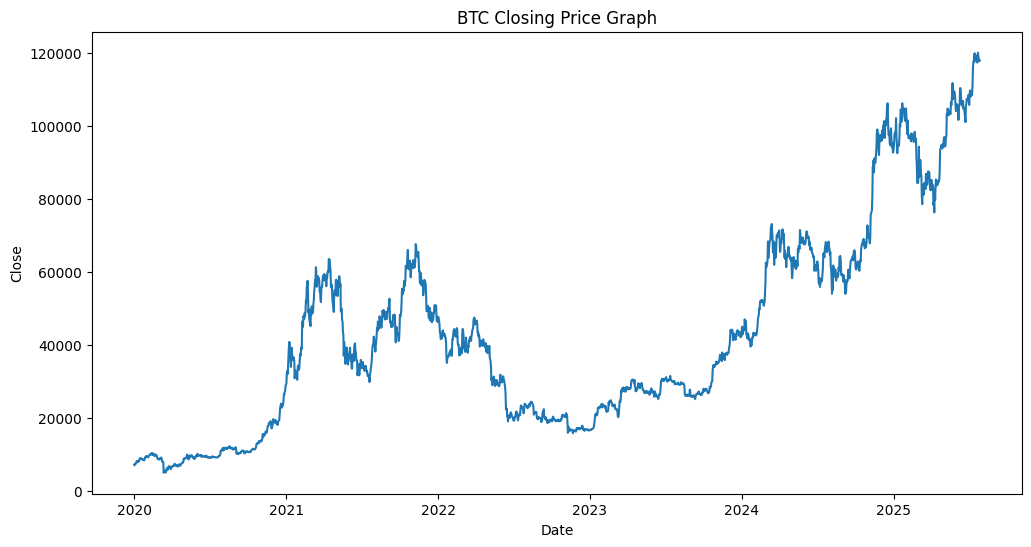

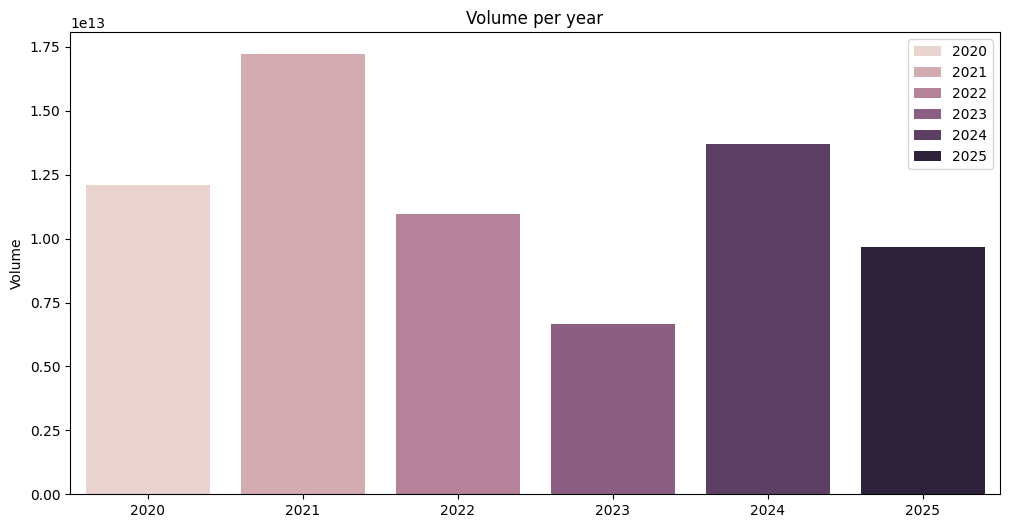

In [491]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date',y='Close',data=df)

plt.title('BTC Closing Price Graph')

#this code came from gpt lol
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.show()


#FEATURE ENGINEERED TO SHOW BAR AND LINE GRAPH
df['Year'] = df['Date'].dt.year

year_only = df['Year'].unique()

volum_per_year = df.groupby('Year')['Volume'].sum()

plt.figure(figsize=(12, 6))
sns.barplot(x=year_only,y=volum_per_year, hue=year_only)

plt.title('Volume per year')
plt.show()

In [492]:
"""
The graph shows how digital era emerge during pandemic,
pre pandemic: 2020
-it describes normal and stable market volume

mid pandemic: 2021-2022
-shows how many people started to merge with digital era, stares in front of the computer all day

post pandemic: 2023
-approaches the end of an era

after pandemic: 2024-present
-market stabilizes and goes back to normal
"""

'\nThe graph shows how digital era emerge during pandemic,\npre pandemic: 2020\n-it describes normal and stable market volume\n\nmid pandemic: 2021-2022\n-shows how many people started to merge with digital era, stares in front of the computer all day\n\npost pandemic: 2023\n-approaches the end of an era\n\nafter pandemic: 2024-present\n-market stabilizes and goes back to normal\n'

In [493]:
df.head()

,Close,High,Low,Open,Volume,Date,Year
2,7200.174316,7254.330566,7174.944336,7194.892090,1.856566e+10,2020-01-01,2020
3,6985.470215,7212.155273,6935.270020,7202.551270,2.080208e+10,2020-01-02,2020
4,7344.884277,7413.715332,6914.996094,6984.428711,2.811148e+10,2020-01-03,2020
5,7410.656738,7427.385742,7309.514160,7345.375488,1.844427e+10,2020-01-04,2020
6,7411.317383,7544.497070,7400.535645,7410.451660,1.972507e+10,2020-01-05,2020


In [494]:
#COMPUTING RSI VALUE STARTING FROM THE 14TH ROW

rsi_window = 14

df['VOLCH'] = df['Volume'].diff().fillna(0)
 
df['Gain'] = df.loc[df['VOLCH'] > 0, 'VOLCH']
df['Loss'] = -df.loc[df['VOLCH'] < 0, 'VOLCH']

df['Gain'] = df['Gain'].fillna(0)
df['Loss'] = df['Loss'].fillna(0)

df['Average gain'] = df['Gain'].rolling(window=rsi_window).mean().fillna(0)
df['Average loss'] = df['Loss'].rolling(window=rsi_window).mean().fillna(0)

df['RSI'] = 100 - (100 / (1 + (df['Average gain'] / df['Average loss'])))

df = df.dropna().drop(columns=['Gain', 'Loss'])

df.head()

,Close,High,Low,Open,Volume,Date,Year,VOLCH,Average gain,Average loss,RSI
15,8827.764648,8879.511719,8140.933105,8140.933105,4.484178e+10,2020-01-14,2020,2.235887e+10,3.557255e+09,1.680389e+09,67.917078
16,8807.010742,8890.117188,8657.187500,8825.343750,4.010283e+10,2020-01-15,2020,-4.738949e+09,3.557255e+09,2.018886e+09,63.794211
17,8723.786133,8846.460938,8612.095703,8812.481445,3.131398e+10,2020-01-16,2020,-8.788853e+09,3.397511e+09,2.646661e+09,56.211355
18,8929.038086,8958.122070,8677.316406,8725.209961,3.637214e+10,2020-01-17,2020,5.058157e+09,3.236708e+09,2.646661e+09,55.014534
19,8942.808594,9012.198242,8827.332031,8927.211914,3.233777e+10,2020-01-18,2020,-4.034367e+09,3.236708e+09,2.244315e+09,59.052990


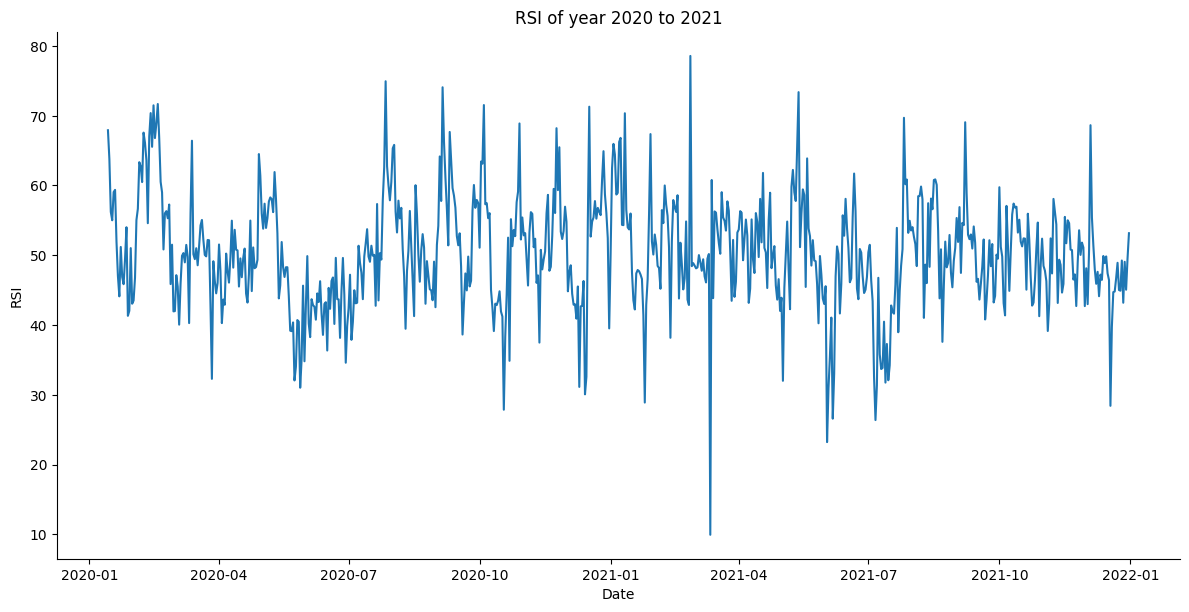

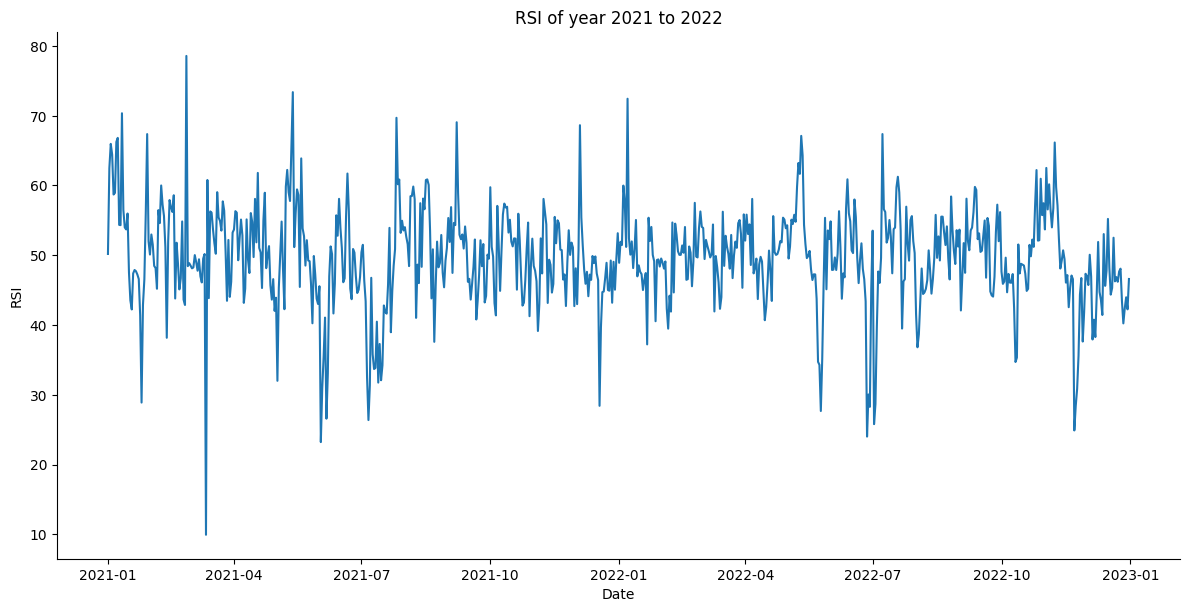

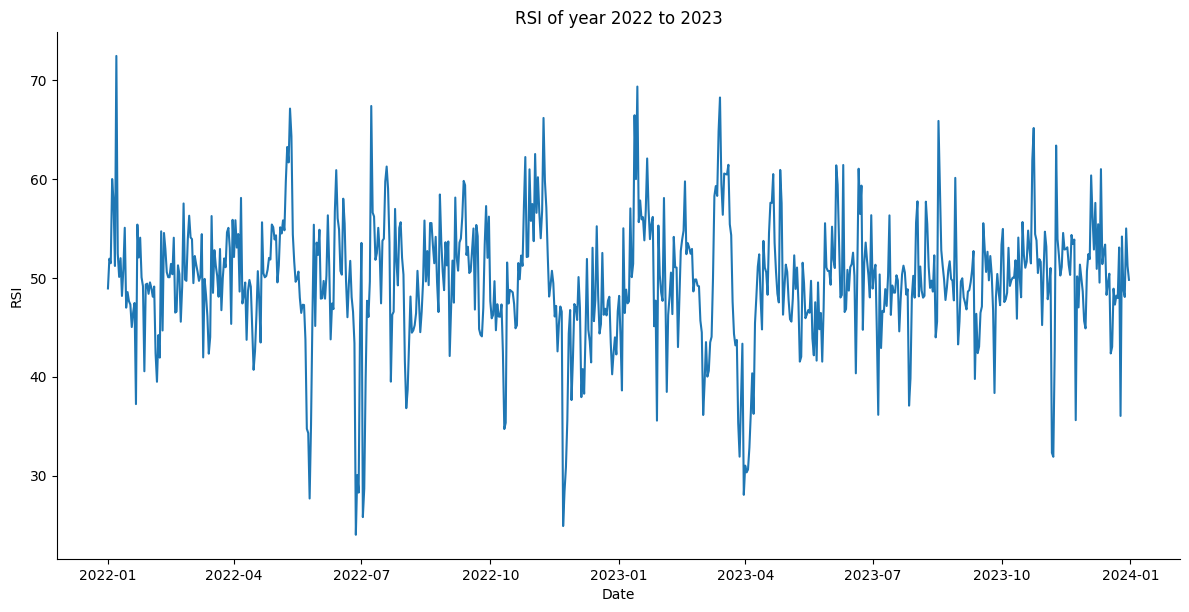

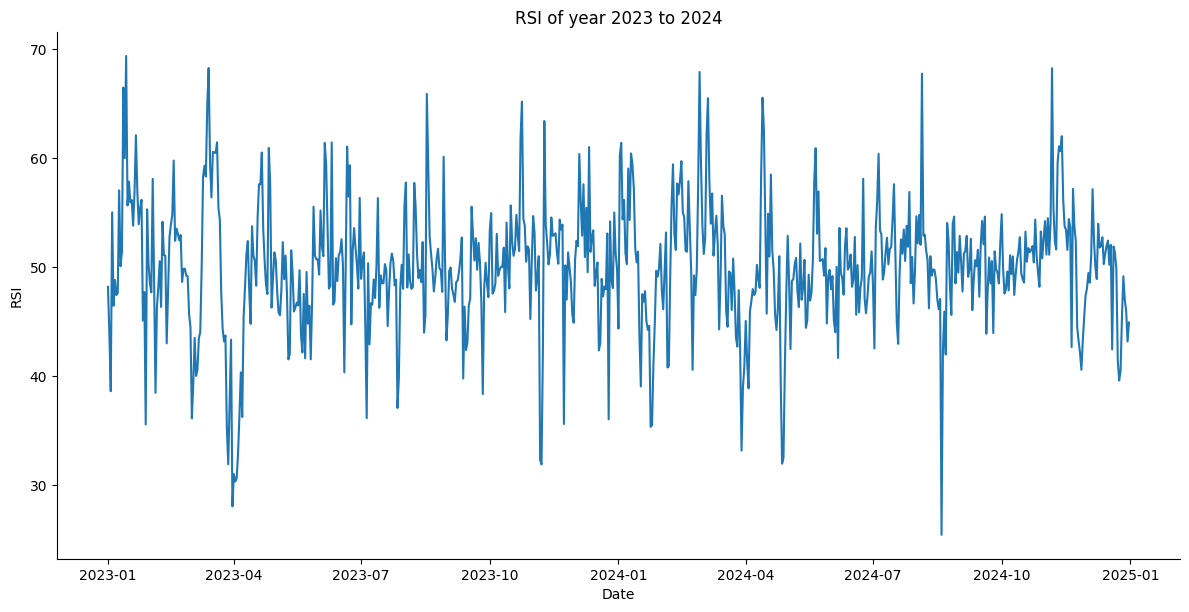

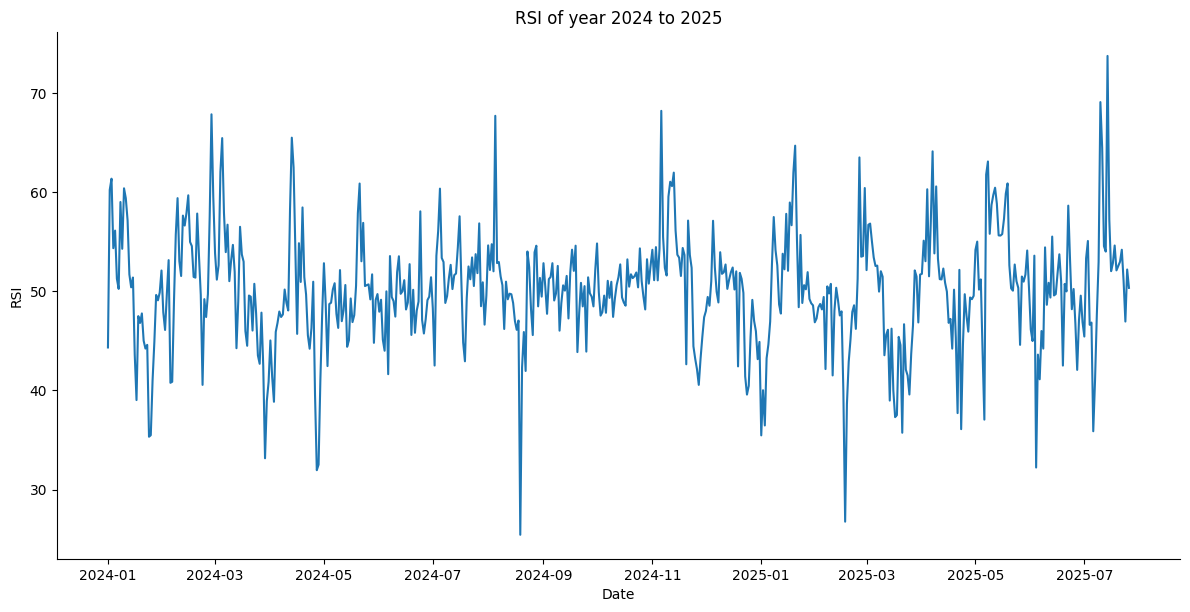

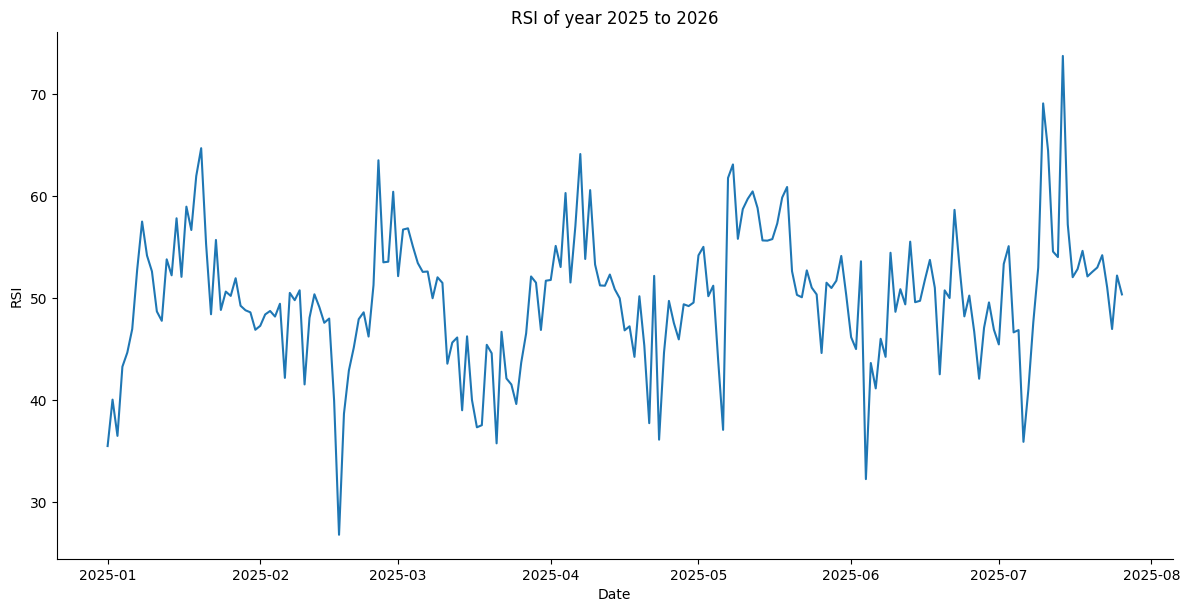

In [495]:
for year in [2020,2021,2022,2023,2024,2025]:
    sns.relplot(x='Date', y='RSI', data=df.loc[(df['Year'] >= year) & (df['Year'] <= year + 1)], kind='line', height=6, aspect=2)
    title = f"RSI of year {year} to {year + 1}"
    plt.title(title)
    plt.show()

In [496]:
df.head()

,Close,High,Low,Open,Volume,Date,Year,VOLCH,Average gain,Average loss,RSI
15,8827.764648,8879.511719,8140.933105,8140.933105,4.484178e+10,2020-01-14,2020,2.235887e+10,3.557255e+09,1.680389e+09,67.917078
16,8807.010742,8890.117188,8657.187500,8825.343750,4.010283e+10,2020-01-15,2020,-4.738949e+09,3.557255e+09,2.018886e+09,63.794211
17,8723.786133,8846.460938,8612.095703,8812.481445,3.131398e+10,2020-01-16,2020,-8.788853e+09,3.397511e+09,2.646661e+09,56.211355
18,8929.038086,8958.122070,8677.316406,8725.209961,3.637214e+10,2020-01-17,2020,5.058157e+09,3.236708e+09,2.646661e+09,55.014534
19,8942.808594,9012.198242,8827.332031,8927.211914,3.233777e+10,2020-01-18,2020,-4.034367e+09,3.236708e+09,2.244315e+09,59.052990


In [497]:
def signal(rsi):
    if rsi > 70 or rsi < 30:
        return "Hold"
    else:
        return "Buy or Sell"

df['Signal'] = df['RSI'].map(lambda rsi: signal(rsi))

df.head()

,Close,High,Low,Open,Volume,Date,Year,VOLCH,Average gain,Average loss,RSI,Signal
15,8827.764648,8879.511719,8140.933105,8140.933105,4.484178e+10,2020-01-14,2020,2.235887e+10,3.557255e+09,1.680389e+09,67.917078,Buy or Sell
16,8807.010742,8890.117188,8657.187500,8825.343750,4.010283e+10,2020-01-15,2020,-4.738949e+09,3.557255e+09,2.018886e+09,63.794211,Buy or Sell
17,8723.786133,8846.460938,8612.095703,8812.481445,3.131398e+10,2020-01-16,2020,-8.788853e+09,3.397511e+09,2.646661e+09,56.211355,Buy or Sell
18,8929.038086,8958.122070,8677.316406,8725.209961,3.637214e+10,2020-01-17,2020,5.058157e+09,3.236708e+09,2.646661e+09,55.014534,Buy or Sell
19,8942.808594,9012.198242,8827.332031,8927.211914,3.233777e+10,2020-01-18,2020,-4.034367e+09,3.236708e+09,2.244315e+09,59.052990,Buy or Sell


In [498]:
dum = pd.get_dummies(data=df['Signal']).astype(int)

df = pd.concat([df,dum],axis=1)

df = df.drop(columns=['Date','Signal'])
df.head()

,Close,High,Low,Open,Volume,Year,VOLCH,Average gain,Average loss,RSI,Buy or Sell,Hold
15,8827.764648,8879.511719,8140.933105,8140.933105,4.484178e+10,2020,2.235887e+10,3.557255e+09,1.680389e+09,67.917078,1,0
16,8807.010742,8890.117188,8657.187500,8825.343750,4.010283e+10,2020,-4.738949e+09,3.557255e+09,2.018886e+09,63.794211,1,0
17,8723.786133,8846.460938,8612.095703,8812.481445,3.131398e+10,2020,-8.788853e+09,3.397511e+09,2.646661e+09,56.211355,1,0
18,8929.038086,8958.122070,8677.316406,8725.209961,3.637214e+10,2020,5.058157e+09,3.236708e+09,2.646661e+09,55.014534,1,0
19,8942.808594,9012.198242,8827.332031,8927.211914,3.233777e+10,2020,-4.034367e+09,3.236708e+09,2.244315e+09,59.052990,1,0


In [499]:
# df['Target Close'] = df['Close'].shift(-1)
# df = df.dropna()
# X = df.drop(columns=['Close','Average gain','Average loss','RSI','Buy or Sell', 'Hold','Target Close'])
# y = df['Target Close']

X = df.drop(columns=['Close'])
y = df['Close']


X_train , X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

model = Pipeline([
    ('scaler', StandardScaler()),
    ('lr', LinearRegression())
    ]
)
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

In [500]:
# lr = LinearRegression()
# lr.fit(X_train_scaled, y_train)
# y_pred = lr.predict(X_test_scaled)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

cv = cross_val_score(model,X=X_test, y=y_test)
print(cv)

print(r2_score(y_true=y_test, y_pred=y_pred))

print(y_test[0:10])
print(y_pred[0:10])

[0.99916805 0.99867358 0.9996271  0.99964223 0.99935167]
0.9994782200293205
689     56942.136719
1398    34089.574219
735     46458.117188
605     46942.218750
591     44428.289062
1299    29908.744141
143      9081.761719
1470    46970.503906
1316    29180.578125
1381    26873.320312
Name: Close, dtype: float64
[58111.59689691 34215.1145451  46342.18424981 47391.37213373
 44844.75187644 29885.55503872  9079.89133396 46248.90814616
 28936.58483198 26836.31647222]


In [ ]:
joblib.dump(model, 'BTCmodel.pkl')

if joblib.load('BTCmodel.pkl'):
    print("Model saved!")

FileNotFoundError: [Errno 2] No such file or directory: 'BTCmode.pkl'